In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from scipy.integrate import solve_ivp


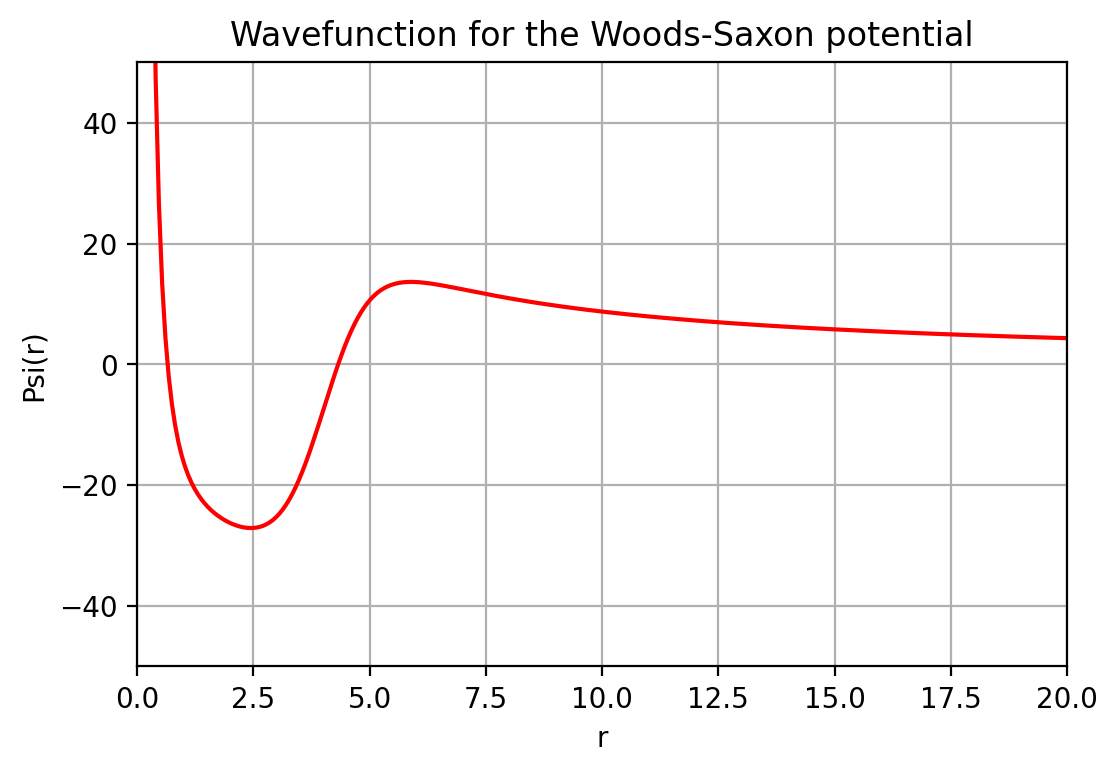

In [6]:




def Gamow_factor(l, eta):
    if eta == 0.0:
        if l == 0:
            return 1
        else:
            return 1 / (2*l + 1) * Gamow_factor(l-1, 0)
    elif l == 0:
        return np.sqrt(2*np.pi*eta / (np.exp(2*np.pi*eta)-1))
    else:
        return np.sqrt(l**2 + eta**2) / (l*(2*l+1)) * Gamow_factor(l-1, eta)

def woods_saxon_potential(r, V0, R, a):
    return -V0 / (1 + np.exp((r - R) / a))

Z1=1
Z2=60

eta=Z1*Z2*1.439

def coulomb_pot(Z1,Z2,r,R):
    
    if r>R:
        return  Z1*Z2*1.439/r
    else:
        return Z1*Z2*1.439/(2*R)*(3-(r/R)**2)


    
def coulomb_pot_list(Z1,Z2,r,R):
    if isinstance(r, (int, float)):
        return coulomb_pot(Z1,Z2,r,R)
    else:
        return np.array([coulomb_pot(Z1,Z2,x,R) for x in r])


def schrodinger_eqn(r, y, E, V0, R, a, l):
    psi, psi_prime = y
    psi_double_prime = (2 * m / hbar**2) * (woods_saxon_potential(r, V0, R, a) + l * (l + 1) / r**2 + coulomb_pot_list(Z1,Z2,r,R)- E) * psi
    return [psi_prime, psi_double_prime]

# Constants
Z1=1
Z2=60

eta=Z1*Z2*1.439
m = 1/2  # Particle mass
hbar = 1  # Reduced Planck constant

# Potential parameters
V0 = 60  # Potential strength
R = 4  # Woods-Saxon potential radius
a = 0.5  # Woods-Saxon potential diffuseness

# Energy and angular momentum quantum number
E = 13.4 - 1.3*1j  # Energy eigenvalue
l = 3   # Angular momentum quantum number


# Integration parameters
r_start = 0.05  # Initial position
r_end=70  # Final position

corr_factor=10

# Initial conditions
psi0 = corr_factor*r_start**(l+1) + 0j # Initial wavefunction value
psi_prime0 = corr_factor*(l+1)*r_start**(l) +0j # Initial derivative value

# Solve the Schrödinger equation
sol = solve_ivp(lambda r, y: schrodinger_eqn(r, y, E, V0, R, a, l), (r_start, r_end), [psi0, psi_prime0], dense_output=True)

# Calculate the wavefunction
r_values = np.linspace(r_start, r_end, 1000)
psi_values = sol.sol(r_values)[0]

potvals=(2 * m / hbar**2) * (woods_saxon_potential(r_values, V0, R, a) + l * (l + 1) / r_values**2 + coulomb_pot_list(Z1,Z2,r_values,R))


# Plot the wavefunction
# plt.plot(r_values, 10*np.real(psi_values)/max(abs(psi_values[800:-1])))
# plt.plot(r_values, 10*np.imag(psi_values)/max(abs(psi_values[800:-1])))

# plt.plot(r_values, 10*np.real(psi_values))
# plt.plot(r_values, 10*np.imag(psi_values))


fig = plt.figure(dpi=200)

plt.plot(r_values, potvals,'r')

# plt.plot(r_values, coulomb_pot_list(Z1,Z2,r_values,R),'g')

plt.ylim(-50,50)

plt.xlim(0,20)

plt.xlabel('r')
plt.ylabel('Psi(r)')
plt.title('Wavefunction for the Woods-Saxon potential')
plt.grid(True)
plt.show()


In [3]:
r_end=70

r_values = np.linspace(r_start, r_end, 1000)

In [78]:
def Sol_maker(E,l,V0, R, a,r_end):
    
    r_start = 0.05  # Initial position
#     r_end = 20  # Final position

    # Initial conditions
    psi0 = corr_factor*r_start**(l+1) +0j  # Initial wavefunction value
    psi_prime0 = corr_factor*(l+1)*r_start**(l) +0j  # Initial derivative value

    # Solve the Schrödinger equation
    sol = solve_ivp(lambda r, y: schrodinger_eqn(r, y, E, V0, R, a, l), (r_start, r_end), [psi0, psi_prime0], dense_output=True
#                     ,rtol=10**(-9),atol=10**(-9)
                   )
    r_values = np.linspace(r_start, r_end, 1000)
    solvals=sol.sol(r_values)[0]
#     return solvals/max(abs(solvals[800:-1]))
    return solvals


In [79]:
totpoints=40
energy_grid=np.linspace(5, 30, 10)

In [137]:
totpoints=100
energy_grid=1j*np.linspace(-2,2, totpoints)+13.4*np.ones(totpoints)

In [138]:
# energy_grid=np.linspace(0.01, 2*2.5, 100)

In [139]:
%%time

sols=[Sol_maker(E,l,V0, R, a, r_end) for E in energy_grid]

CPU times: user 1.57 s, sys: 0 ns, total: 1.57 s
Wall time: 1.57 s


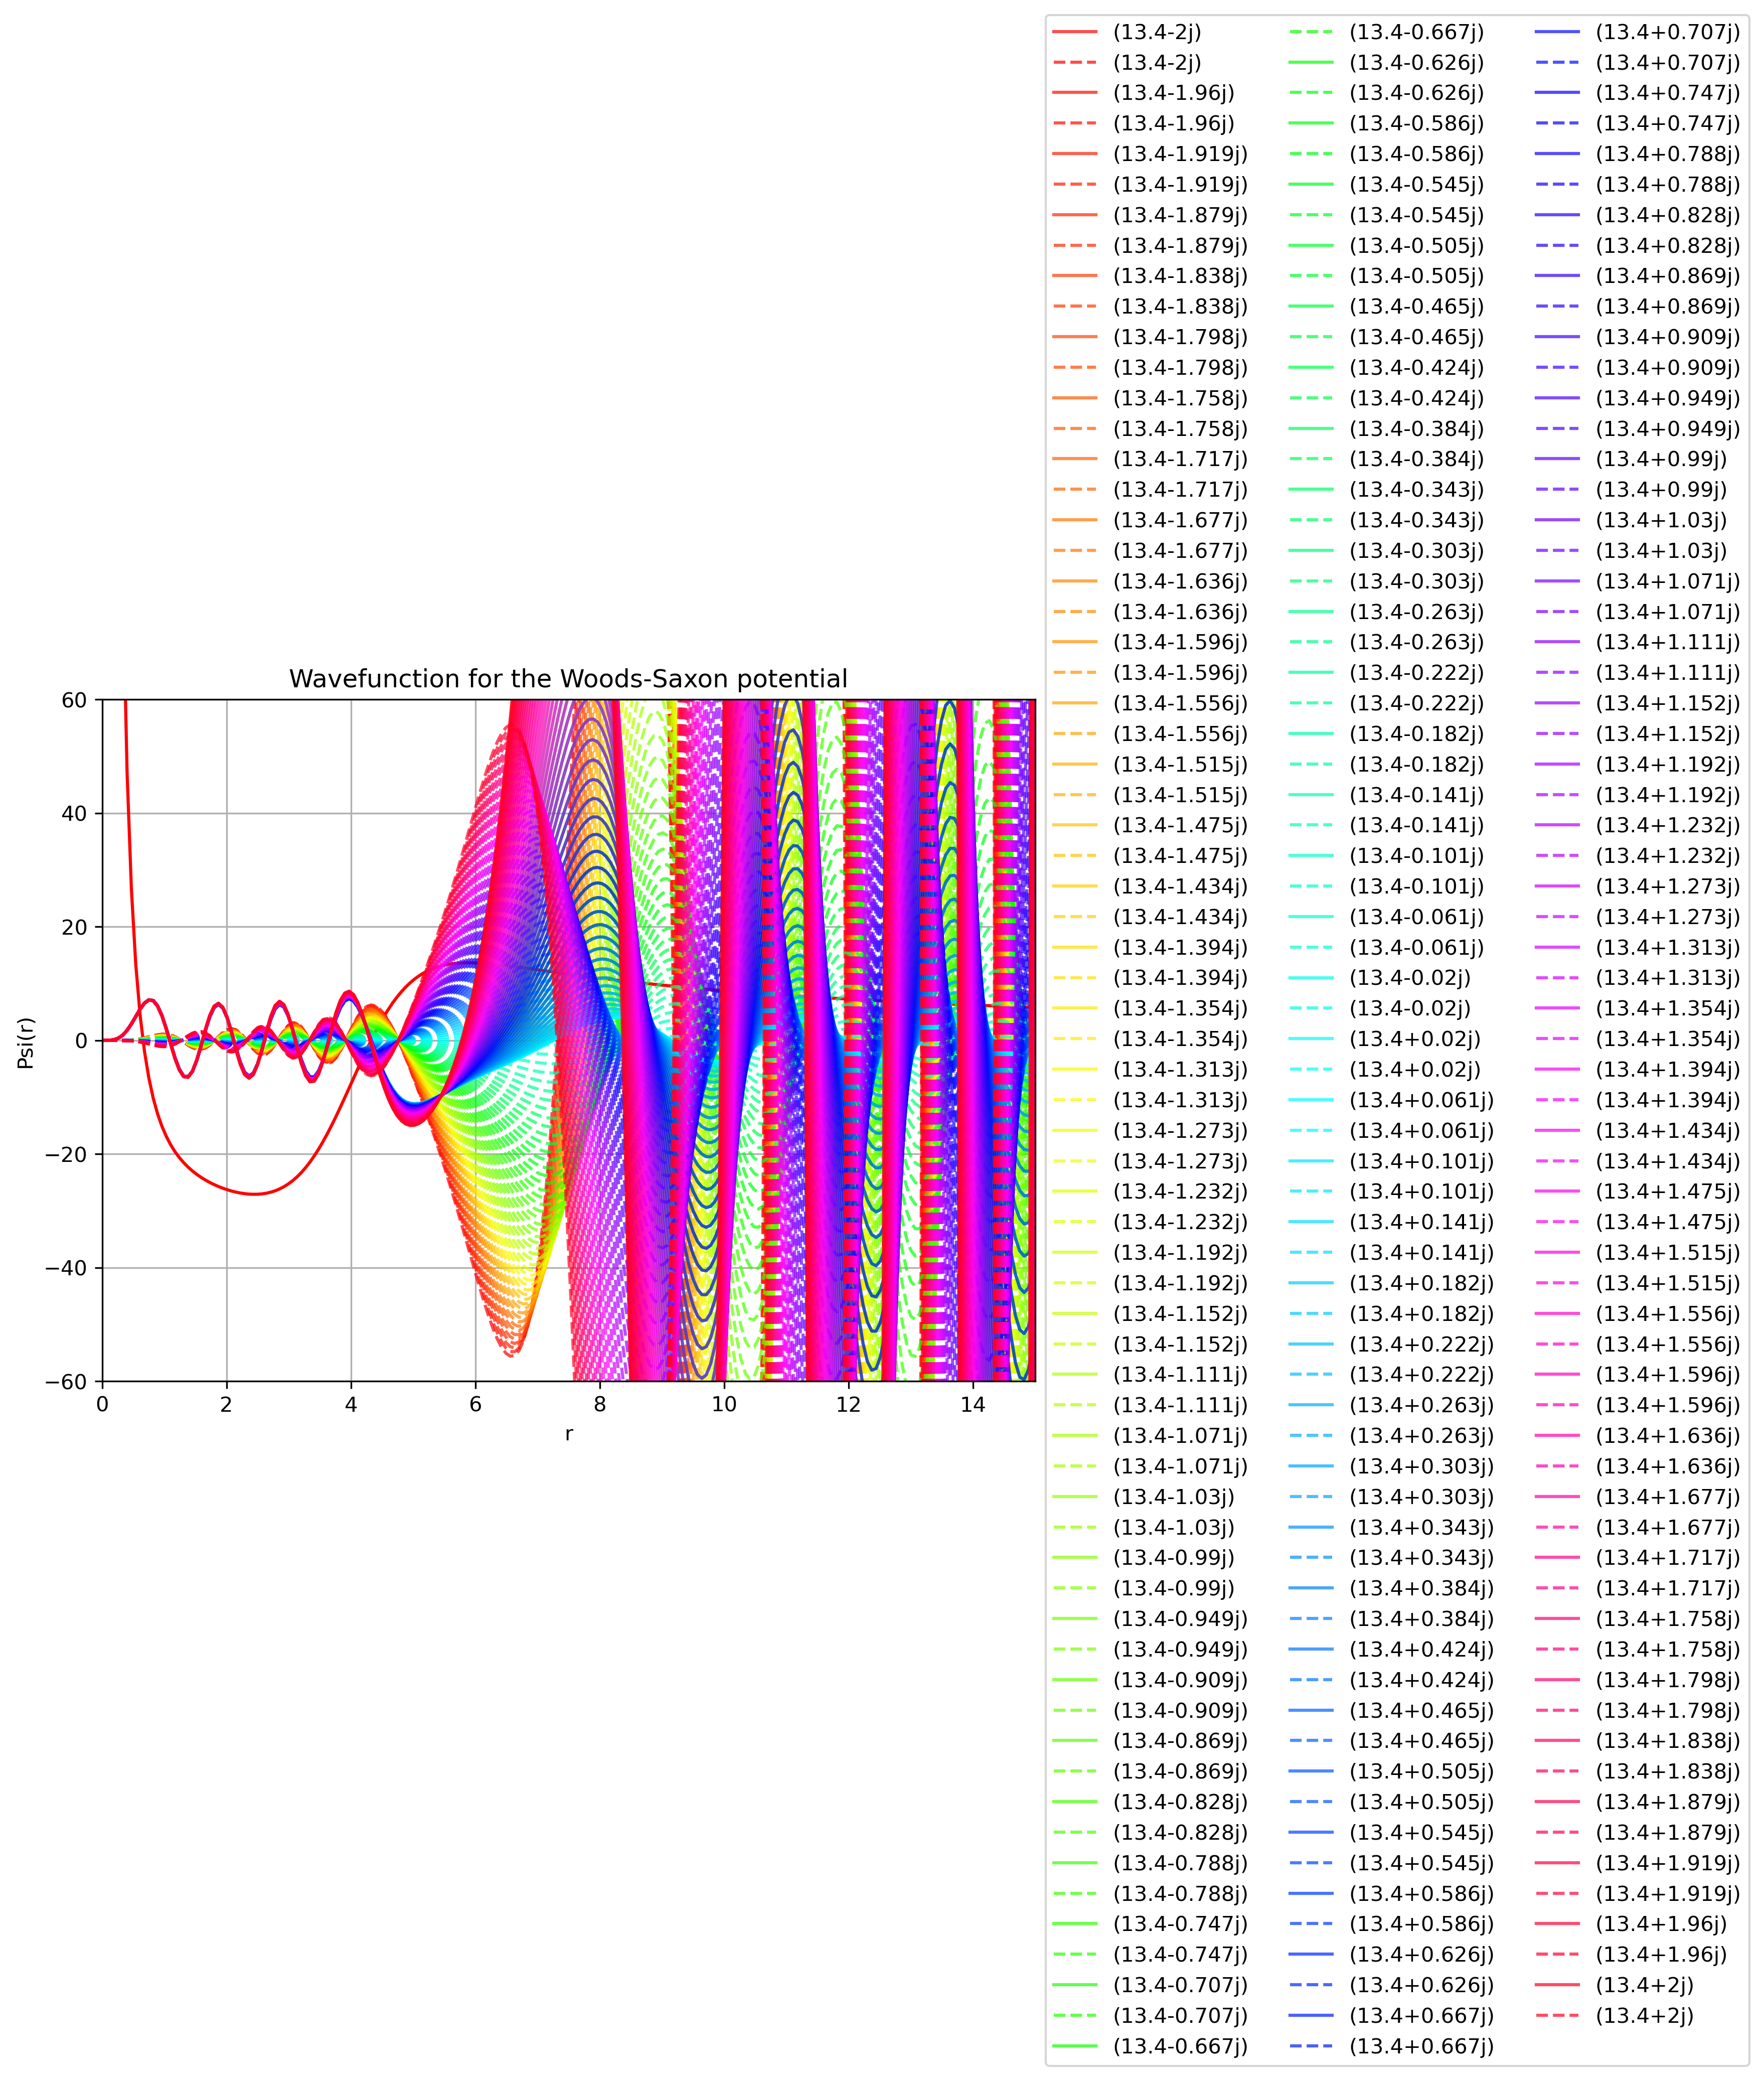

In [140]:
# Plot the wavefunction
fig = plt.figure(figsize=(8, 6), dpi=300)
plt.plot(r_values, potvals,'r')
cmap = cm.hsv

for i in range(len(sols)):
    plt.plot(r_values, 10*np.real(sols[i]),label=f'{np.round(energy_grid[i],3)}',alpha=0.7,color=cmap(i/len(sols)))
    plt.plot(r_values, 10*np.imag(sols[i]),label=f'{np.round(energy_grid[i],3)}',alpha=0.7,color=cmap(i/len(sols)),
            linestyle='dashed')

# for i in range(10):
#     plt.plot(r_values, sols[15+i],label=f'{i+1}')


plt.legend( loc='center left', bbox_to_anchor=(1, 0.5),ncol=3)

plt.ylim(-60,60)

plt.xlim(0,15)

# plt.legend(loc='right')

plt.xlabel('r')
plt.ylabel('Psi(r)')
plt.title('Wavefunction for the Woods-Saxon potential')
plt.grid(True)
plt.show()

In [141]:
maxvals_list_real=[max(abs(np.real(sol[800:-1]))) for sol in sols]
maxvals_list_img=[max(abs(np.imag(sol[800:-1]))) for sol in sols]

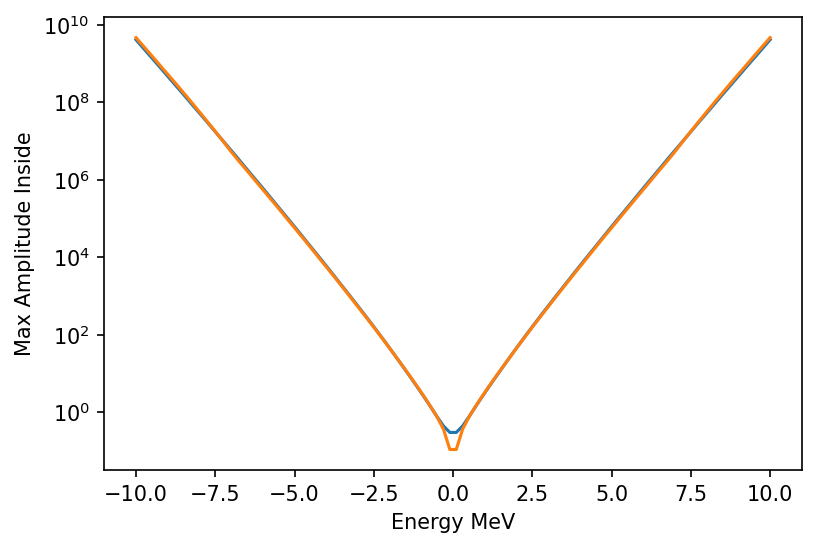

In [142]:
fig = plt.figure(dpi=150)

plt.plot(np.linspace(-10,10, totpoints),maxvals_list_real)

plt.plot(np.linspace(-10,10, totpoints),maxvals_list_img)

plt.xlabel('Energy MeV')
plt.ylabel('Max Amplitude Inside')

plt.yscale('log')

plt.show()

In [101]:
V0,R,a,l

(60, 4, 0.5, 3)

In [10]:
energy_grid_finer=np.linspace(10, 15, 300)
sols_finer=[Sol_maker(E,l,V0, R, a, r_end) for E in energy_grid_finer]

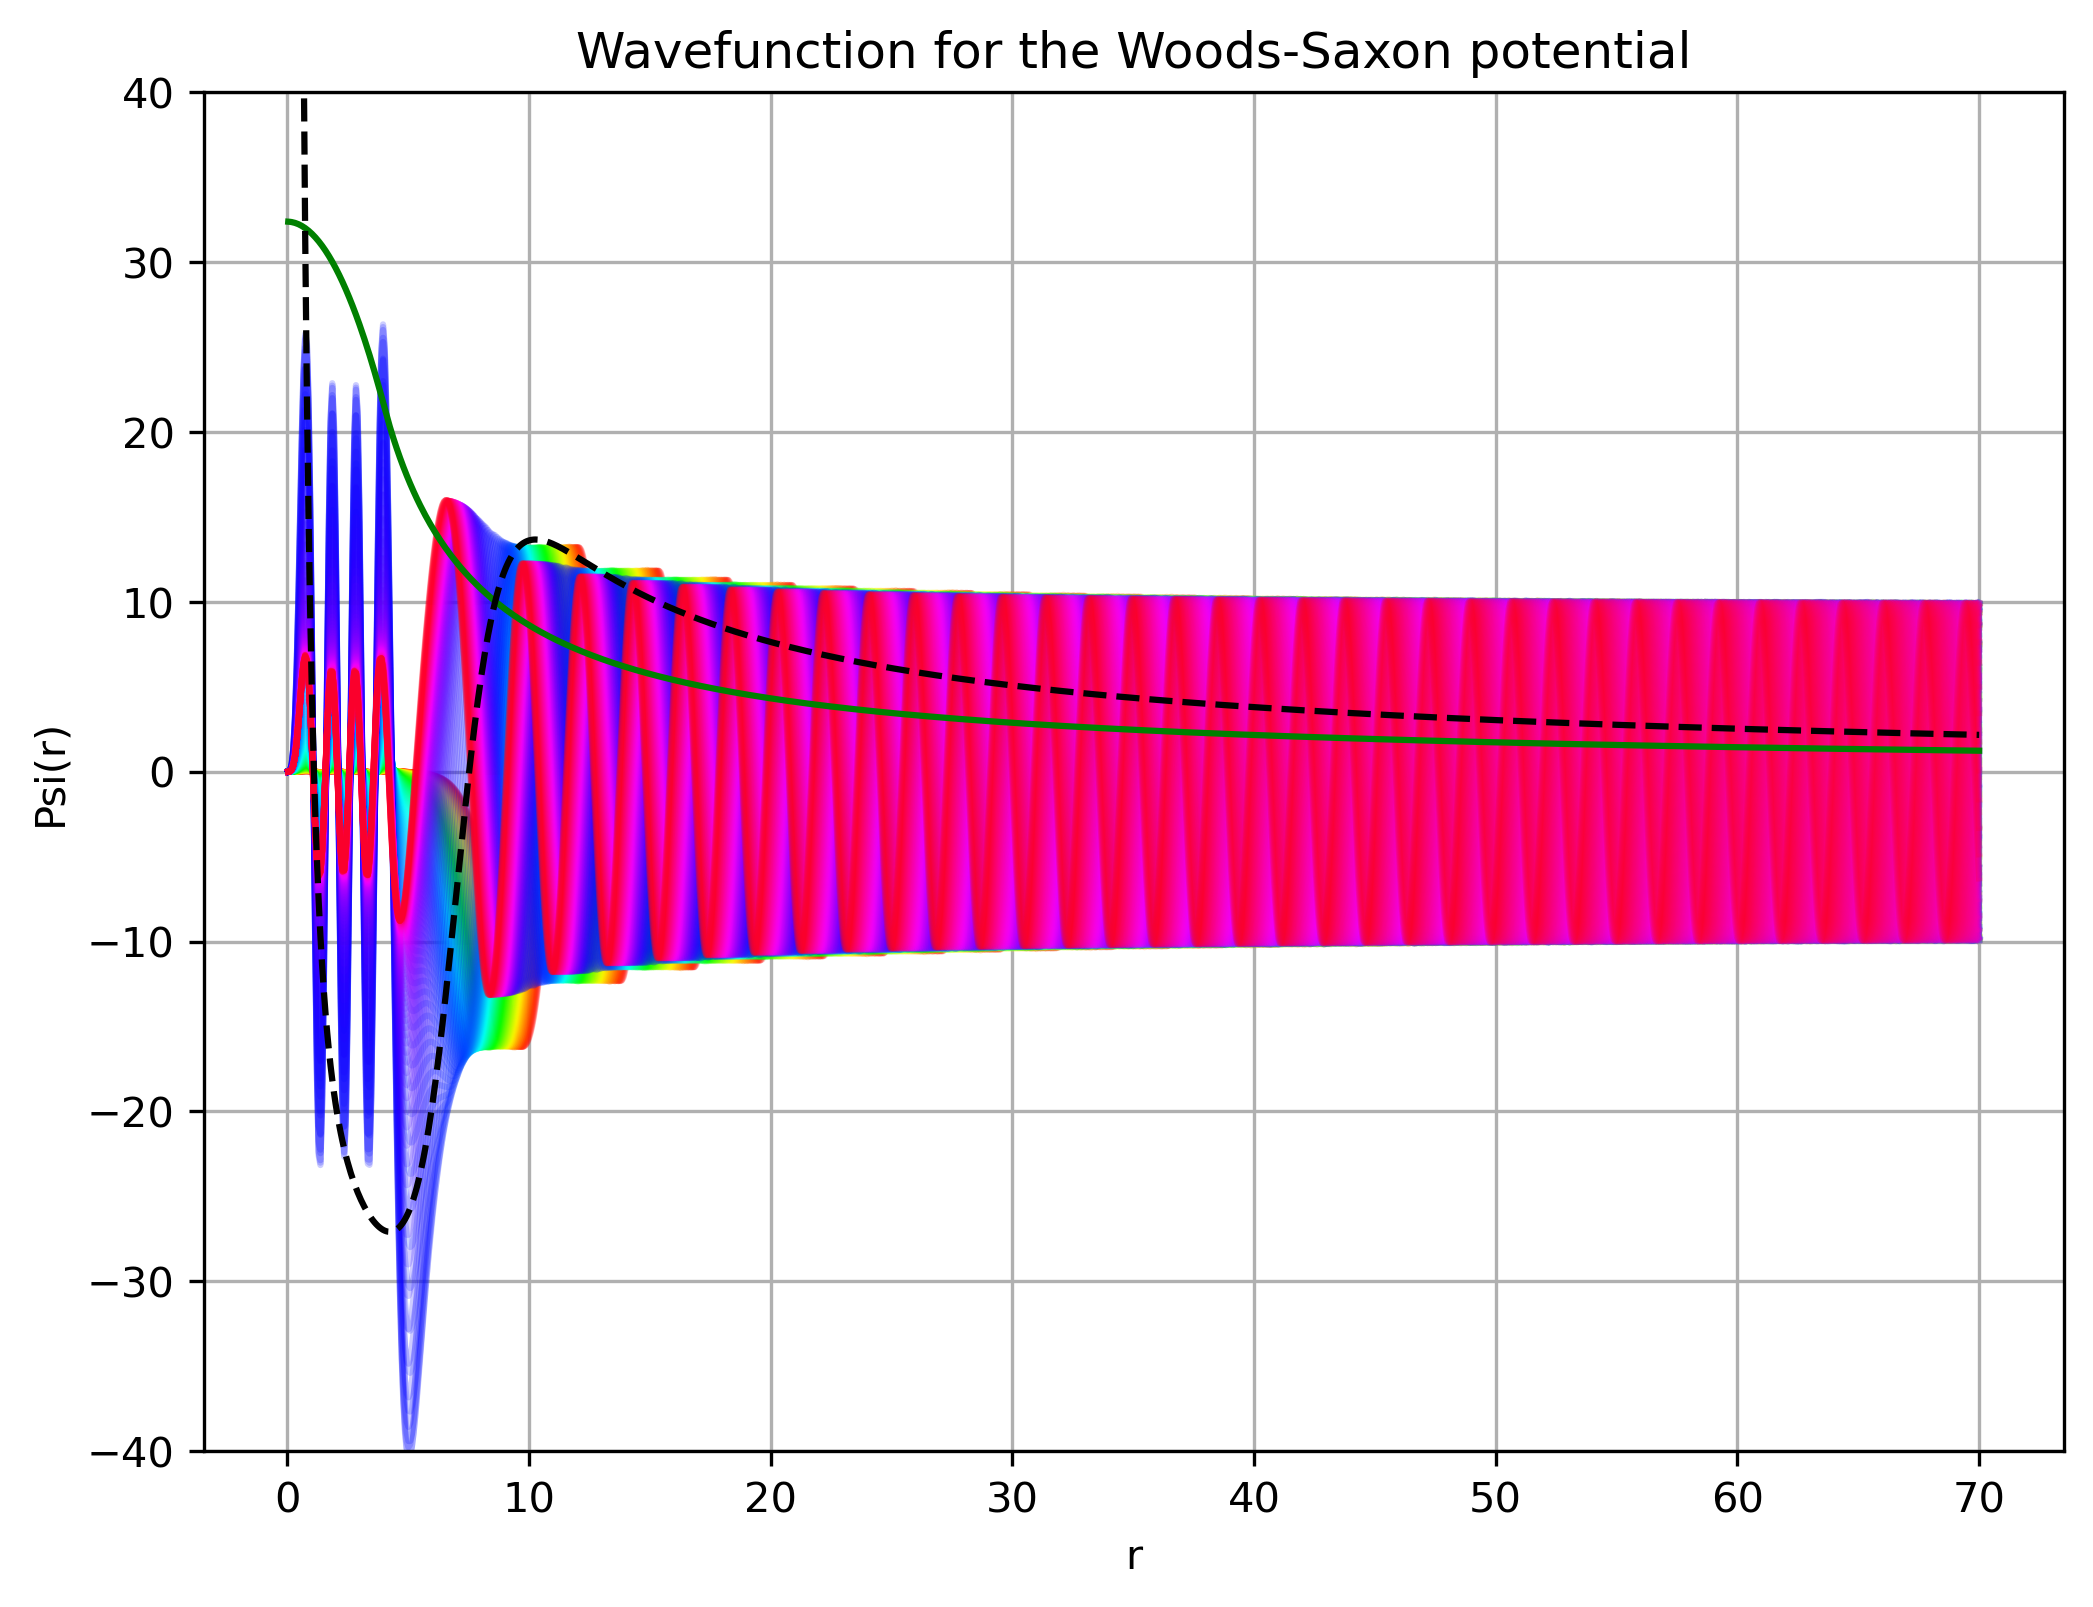

In [11]:
# Plot the wavefunction

fig = plt.figure(figsize=(8, 6), dpi=300)



cmap = cm.hsv

# for i in range(len(sols)):
#     plt.plot(r_values, sols[i],color='k',alpha=0.5)

for i in range(len(sols_finer)):
    
    plt.plot(r_values, 10*sols_finer[i],label=f'{round(energy_grid_finer[i],5)}',color=cmap(i/len(sols_finer)),alpha=0.2)

    
plt.plot(r_values, coulomb_pot_list(Z1,Z2,r_values,R),'g')
    
plt.plot(r_values, potvals,'k',linestyle='dashed')
    
plt.ylim(-40,40)

# plt.legend()
# plt.legend( loc='center left', bbox_to_anchor=(1, 0.5),ncol=3)

plt.xlabel('r')
plt.ylabel('Psi(r)')
plt.title('Wavefunction for the Woods-Saxon potential')
plt.grid(True)
plt.show()

In [12]:
energy_grid_finer=np.linspace(10, 15, 50)
sols_finer=[Sol_maker(E,l,V0, R, a, r_end) for E in energy_grid_finer]

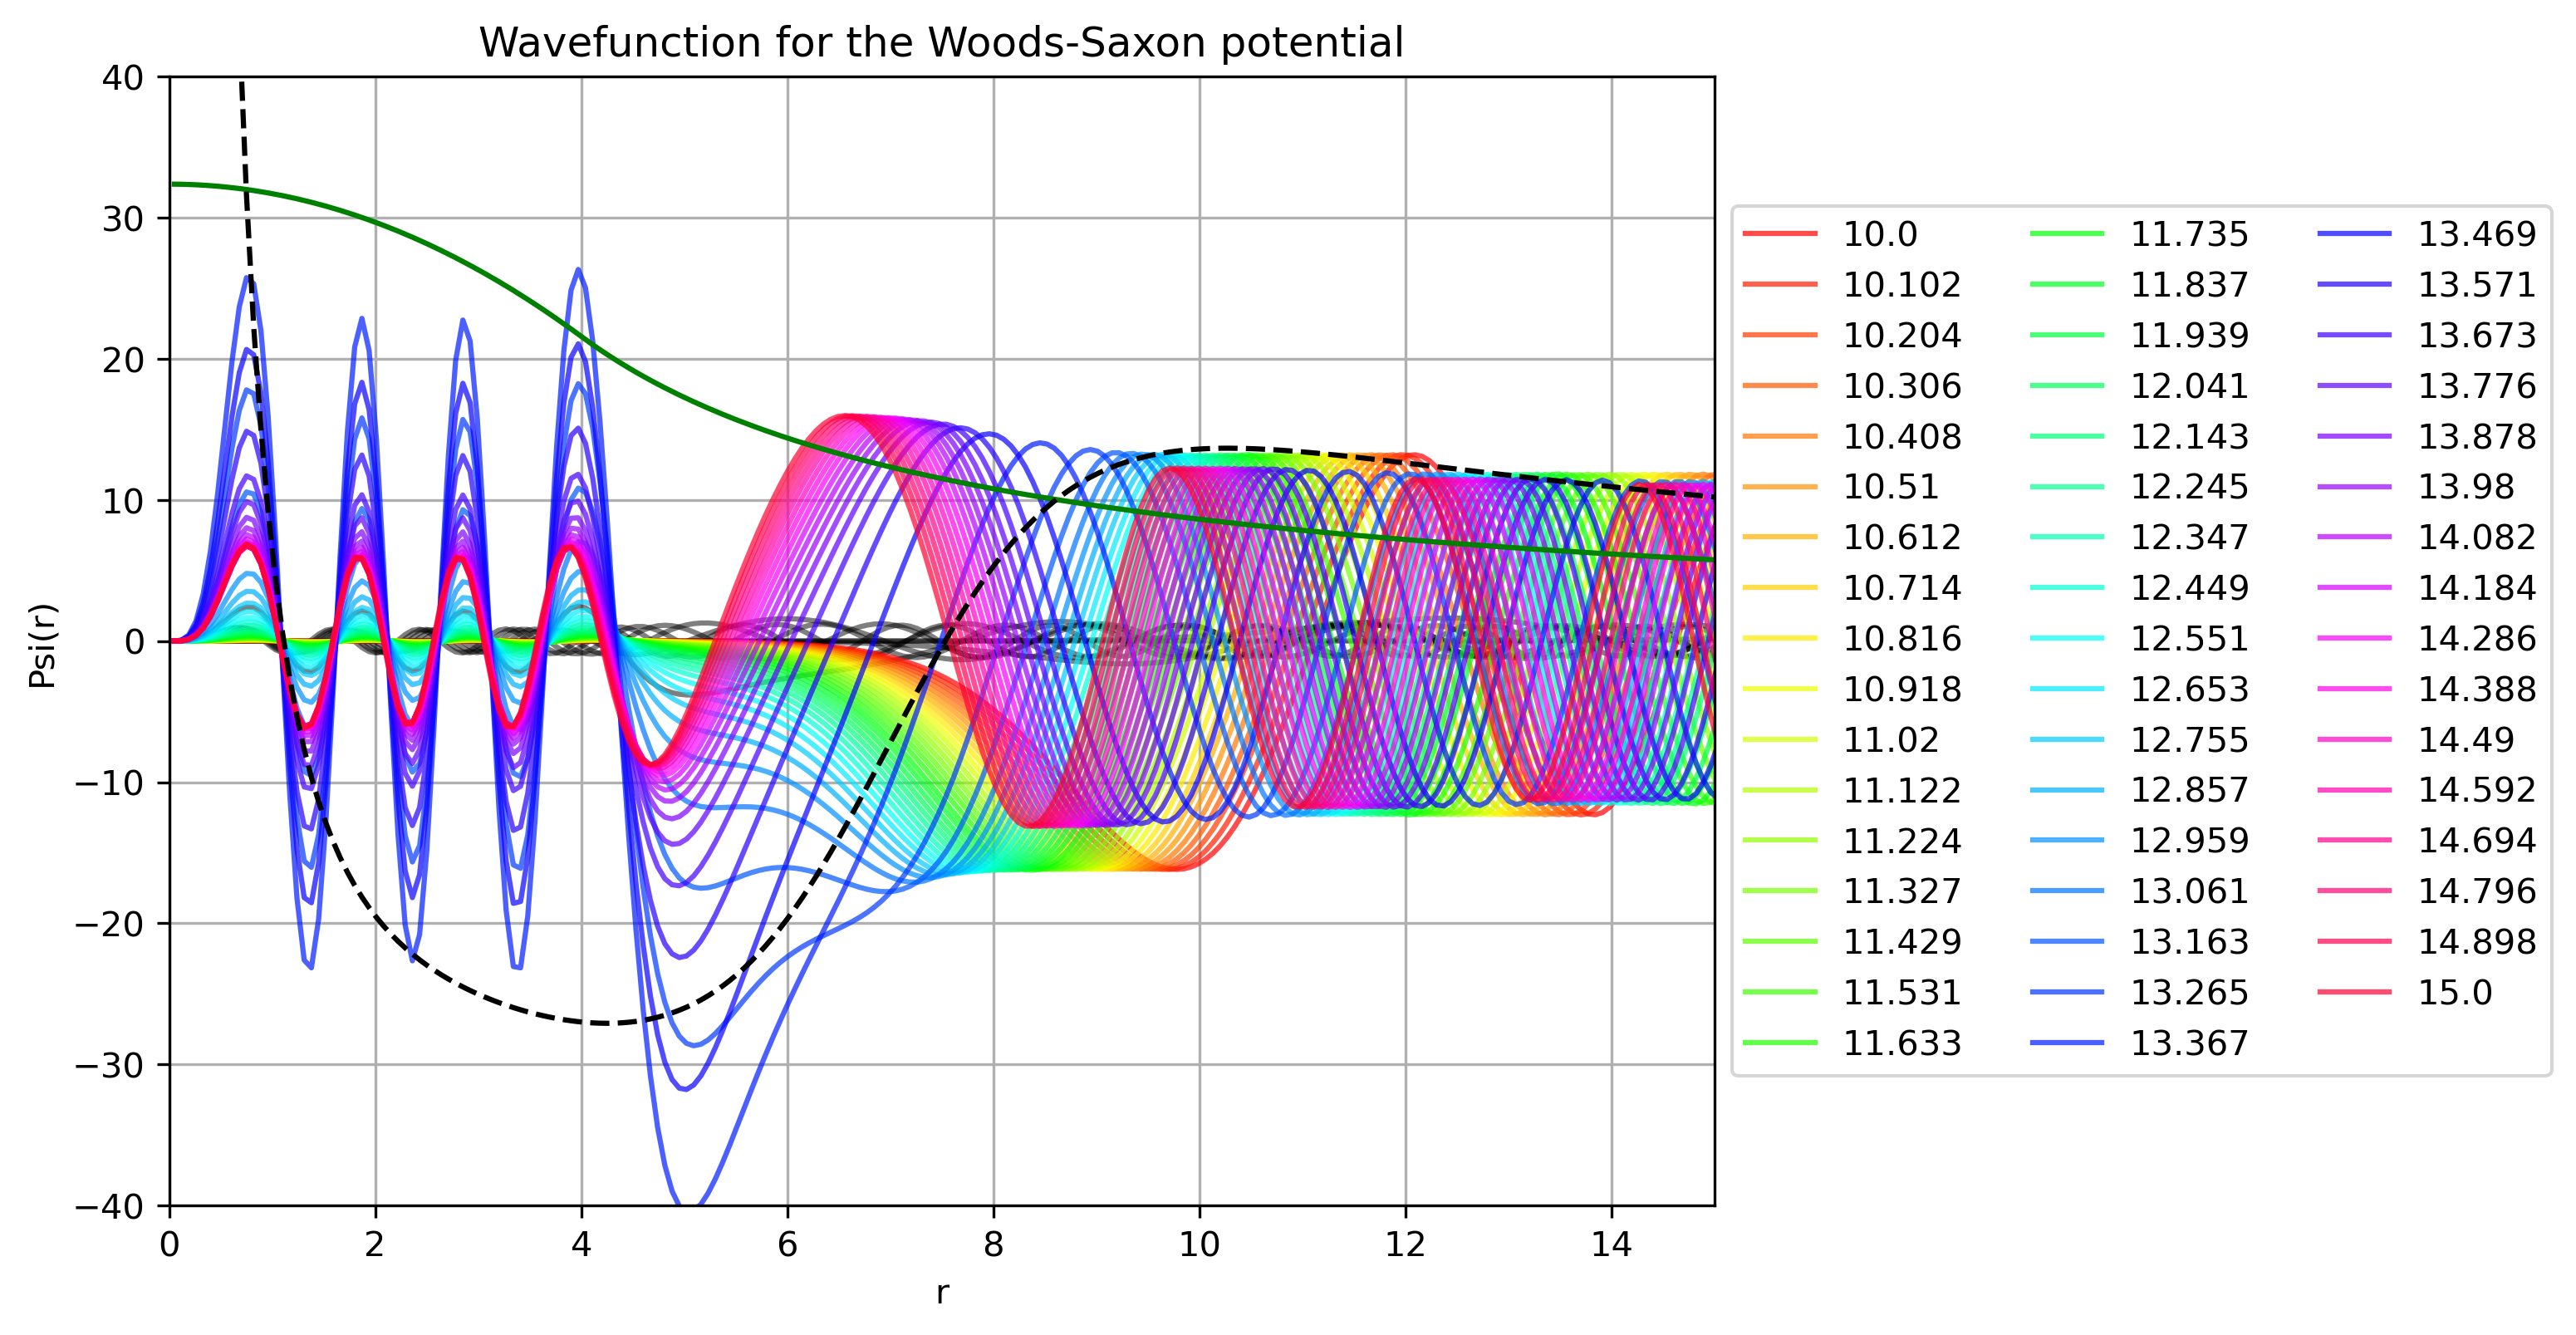

In [13]:
# Plot the wavefunction

fig = plt.figure(figsize=(8, 6), dpi=300)



cmap = cm.hsv

for i in range(len(sols)):
    plt.plot(r_values, sols[i],color='k',alpha=0.5)

for i in range(len(sols_finer)):
    
    plt.plot(r_values, 10*sols_finer[i],label=f'{round(energy_grid_finer[i],3)}',color=cmap(i/len(sols_finer)),alpha=0.7)

    

plt.plot(r_values, coulomb_pot_list(Z1,Z2,r_values,R),'g')
    
plt.plot(r_values, potvals,'k',linestyle='dashed')
    
plt.ylim(-40,40)

plt.xlim(0,15)

# plt.legend()
plt.legend( loc='center left', bbox_to_anchor=(1, 0.5),ncol=3)

plt.xlabel('r')
plt.ylabel('Psi(r)')
plt.title('Wavefunction for the Woods-Saxon potential')
plt.grid(True)
plt.show()

In [39]:
energy_grid_finer=np.linspace(10, 15, 200)
sols_finer=[Sol_maker(E,l,V0, R, a, r_end) for E in energy_grid_finer]

In [40]:
maxvals_list=[max(abs(sol[0:100])) for sol in sols_finer]

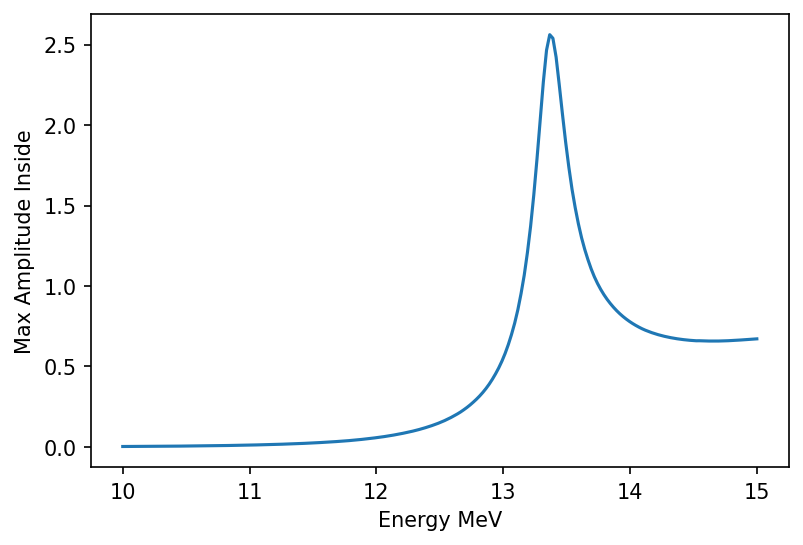

In [41]:
fig = plt.figure(dpi=150)

plt.plot(energy_grid_finer,maxvals_list)

plt.xlabel('Energy MeV')
plt.ylabel('Max Amplitude Inside')

plt.show()